# Visual Weather Systems CNN

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
import keras
import tensorflow as tf
print(f"Keras version: {keras.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Keras version: 3.6.0
TensorFlow version: 2.17.0


# Loading and Pre-processing Weather Images

In [3]:
# Check the number of images in each directory

path = r'/Users/roxanamiu/Documents/Climate Change project 2/Weather'

folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', '.DS_Store', 'Shine', 'Sunrise']


In [4]:
# load the pictures and rescale them

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [5]:
# CNN to categorize the images 

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

# Compiling and Runnning

In [6]:
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 25,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/25


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 351ms/step - accuracy: 0.4405 - loss: 0.1554 - val_accuracy: 0.5185 - val_loss: 0.1371
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5833 - loss: 0.1315 - val_accuracy: 0.7500 - val_loss: 0.0964
Epoch 3/25


2024-11-05 23:37:40.982997: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Applications/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-11-05 23:37:41.051577: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 394ms/step - accuracy: 0.6531 - loss: 0.1000 - val_accuracy: 0.6667 - val_loss: 0.0920
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 0.1197 - val_accuracy: 0.5000 - val_loss: 0.1793
Epoch 5/25


2024-11-05 23:38:11.006479: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 419ms/step - accuracy: 0.6989 - loss: 0.0957 - val_accuracy: 0.6991 - val_loss: 0.0966
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9167 - loss: 0.0426 - val_accuracy: 0.7500 - val_loss: 0.0895
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 372ms/step - accuracy: 0.8019 - loss: 0.0702 - val_accuracy: 0.7315 - val_loss: 0.0934
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.8333 - loss: 0.0511 - val_accuracy: 0.7500 - val_loss: 0.0757
Epoch 9/25


2024-11-05 23:39:11.100201: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 380ms/step - accuracy: 0.8741 - loss: 0.0501 - val_accuracy: 0.7778 - val_loss: 0.0894
Epoch 10/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.9167 - loss: 0.0505 - val_accuracy: 0.7500 - val_loss: 0.1042
Epoch 11/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 388ms/step - accuracy: 0.8304 - loss: 0.0592 - val_accuracy: 0.8148 - val_loss: 0.0701
Epoch 12/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0139
Epoch 13/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 365ms/step - accuracy: 0.8925 - loss: 0.0409 - val_accuracy: 0.8333 - val_loss: 0.0634
Epoch 14/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.1106 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 15/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 393ms/step - accuracy: 0.8923 - loss: 0.0398 - val_accuracy: 0.8009 - val_loss: 0.0791
Epoch 16/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.7500 - loss: 0.0762 - val_accuracy: 0.62

2024-11-05 23:41:07.452410: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 373ms/step - accuracy: 0.8975 - loss: 0.0403 - val_accuracy: 0.7500 - val_loss: 0.0820
Epoch 18/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.7500 - loss: 0.0799 - val_accuracy: 1.0000 - val_loss: 0.0283
Epoch 19/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 390ms/step - accuracy: 0.8860 - loss: 0.0434 - val_accuracy: 0.7778 - val_loss: 0.0726
Epoch 20/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.9167 - loss: 0.0519 - val_accuracy: 1.0000 - val_loss: 0.0138
Epoch 21/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 402ms/step - accuracy: 0.8701 - loss: 0.0522 - val_accuracy: 0.8194 - val_loss: 0.0614
Epoch 22/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9167 - loss: 0.0228 - val_accuracy: 0.6250 - val_loss: 0.0985
Epoch 23/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 431ms/step - accuracy: 0.9125 - loss: 0.0362 - val_accuracy: 0.8287 - val_loss: 0.0620
Epoch 24/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.7354e-04 - val_accuracy: 0.

## 4. Results

In [7]:
results = pd.DataFrame(model.history.history)

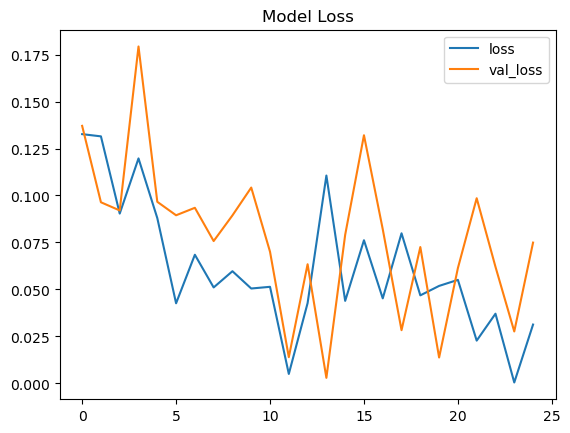

In [8]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

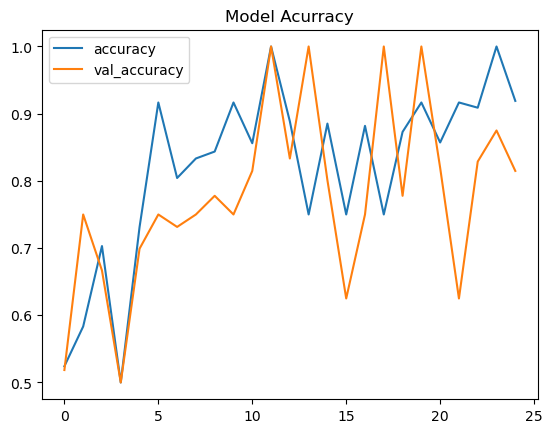

In [9]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [10]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9190101027488708, Val_Accuracy: 0.8148148059844971
Loss: 0.03129836916923523, Val_Loss: 0.07491859793663025


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 354ms/step


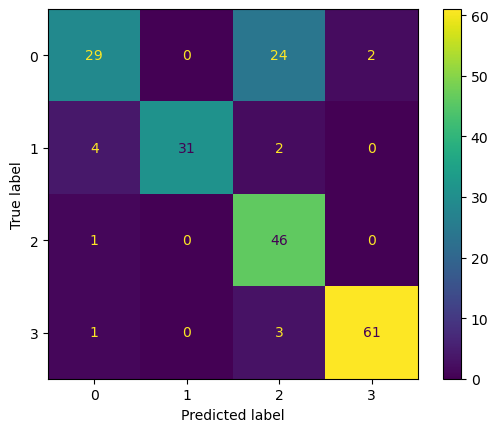

In [11]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [12]:
# This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


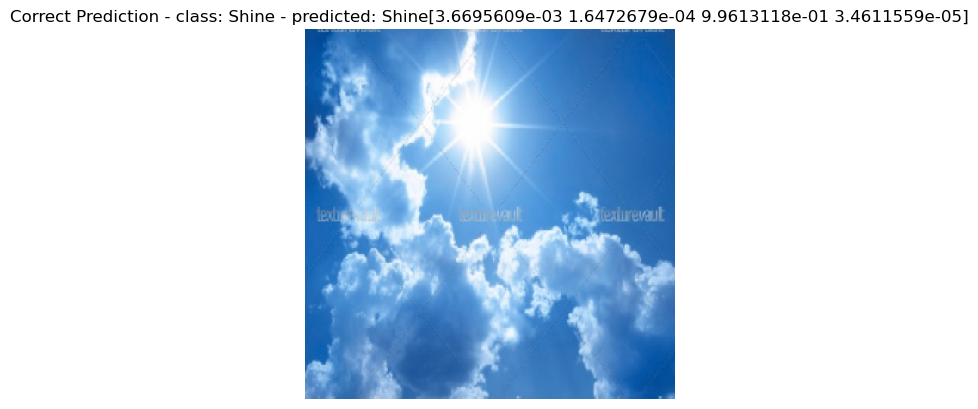

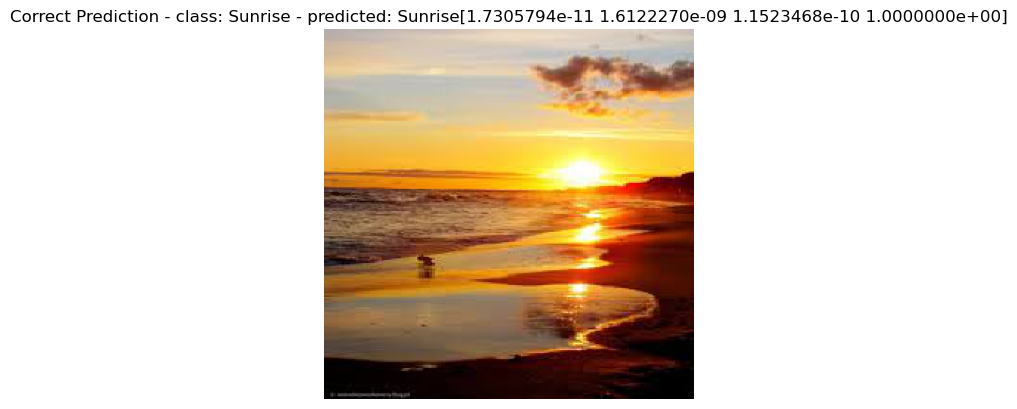

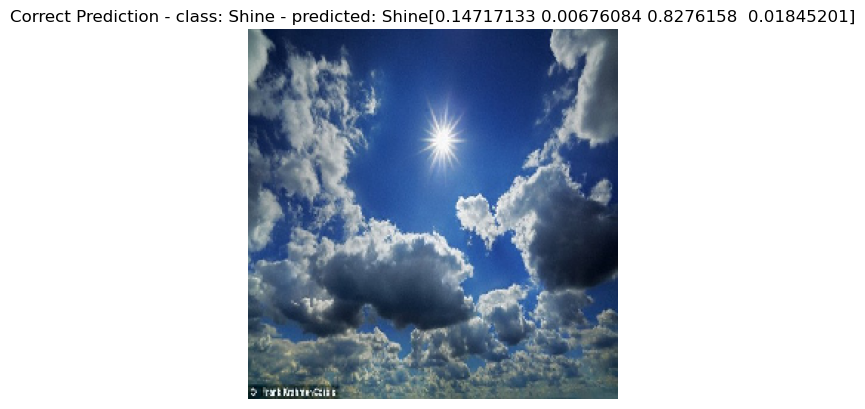

In [15]:
predict_one(model, 3) #<--you can show multiple pictures with this command. Just fill in the number you want to see.